<a href="https://colab.research.google.com/github/neel26desai/deep_learing_with_low_code_libraries/blob/main/FastAi_Vision2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification


In [1]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [2]:
from fastai.vision.all import *
import pandas as pd


In [8]:
path = untar_data(URLs.MNIST_TINY)
path.ls()

(#5) [Path('/root/.fastai/data/mnist_tiny/valid'),Path('/root/.fastai/data/mnist_tiny/models'),Path('/root/.fastai/data/mnist_tiny/test'),Path('/root/.fastai/data/mnist_tiny/labels.csv'),Path('/root/.fastai/data/mnist_tiny/train')]

In [9]:
import os
print(os.listdir(os.path.join(path, 'train', '3')))

['9053.png', '8254.png', '811.png', '7433.png', '9974.png', '7043.png', '9037.png', '861.png', '8039.png', '8544.png', '867.png', '9730.png', '890.png', '992.png', '9797.png', '7618.png', '9932.png', '8800.png', '7778.png', '975.png', '8425.png', '8055.png', '7080.png', '8729.png', '9192.png', '9778.png', '9078.png', '7387.png', '7521.png', '8241.png', '7655.png', '8054.png', '7600.png', '9004.png', '7065.png', '9279.png', '8200.png', '9696.png', '808.png', '8395.png', '8018.png', '7980.png', '8700.png', '8710.png', '9529.png', '9418.png', '8635.png', '7367.png', '857.png', '8756.png', '8882.png', '9335.png', '7293.png', '8524.png', '9424.png', '7692.png', '8259.png', '7635.png', '7295.png', '7672.png', '7463.png', '8708.png', '7584.png', '874.png', '8475.png', '8795.png', '7415.png', '8077.png', '8450.png', '7976.png', '9561.png', '8120.png', '9230.png', '7483.png', '7214.png', '9871.png', '9412.png', '7745.png', '895.png', '9302.png', '7762.png', '8830.png', '8195.png', '8528.png', '

In [24]:
os.listdir(os.path.join(path, 'train'))

['7', '3']

The mnist tiny dataset has only 2 set of images handwritten 7s and handwritten 3

In [10]:
#making a data block for loading the data
mnist = DataBlock(blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),  # we'll have 2 blocks one for the Black and white images and one for the label
                  get_items=get_image_files,
                  splitter=GrandparentSplitter(), # will look for train and test folder
                  get_y=parent_label#will use the parent directory name for assigning  a label
                  )

In [11]:
#creating a data loader
dls = mnist.dataloaders(path)

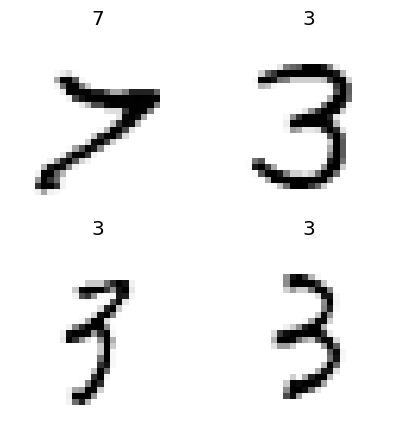

In [14]:
#visualizing some data from our data loader
dls.show_batch(max_n=4, nrows=2,figsize=(5,5))

In [15]:
mnist.summary(path)

Setting-up type transforms pipelines
Found 1428 items
2 datasets of sizes 709,699
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/mnist_tiny/train/7/8205.png
    applying PILBase.create gives
      PILImageBW mode=L size=28x28
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/mnist_tiny/train/7/8205.png
    applying parent_label gives
      7
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(1)

Final sample: (PILImageBW mode=L size=28x28, TensorCategory(1))


Found 1428 items
2 datasets of sizes 709,699
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: ToTensor
Sett

In [16]:
#creating a leaarner passing it our data loader and using a pretrainer resent18 model
learner = vision_learner(dls, resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 137MB/s]


In [17]:
#fine tuning it, for 5 epochs
learner.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.893458,0.268139,0.915594,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.323858,0.236400,0.922747,00:01
1,0.238497,0.145176,0.947067,00:02
2,0.161483,0.126237,0.971388,00:02
3,0.126767,0.108106,0.971388,00:01
4,0.097827,0.100520,0.969957,00:01


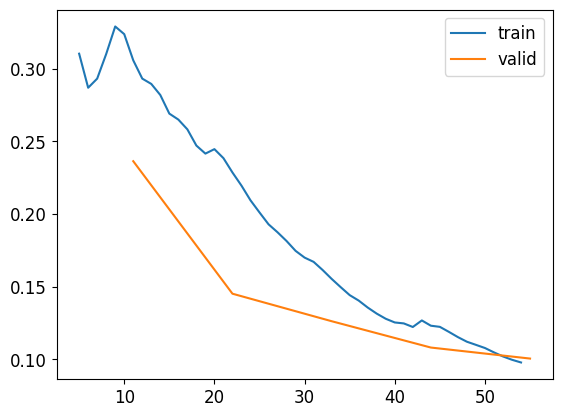

In [21]:
#showing the result metrics
learner.recorder.plot_loss()


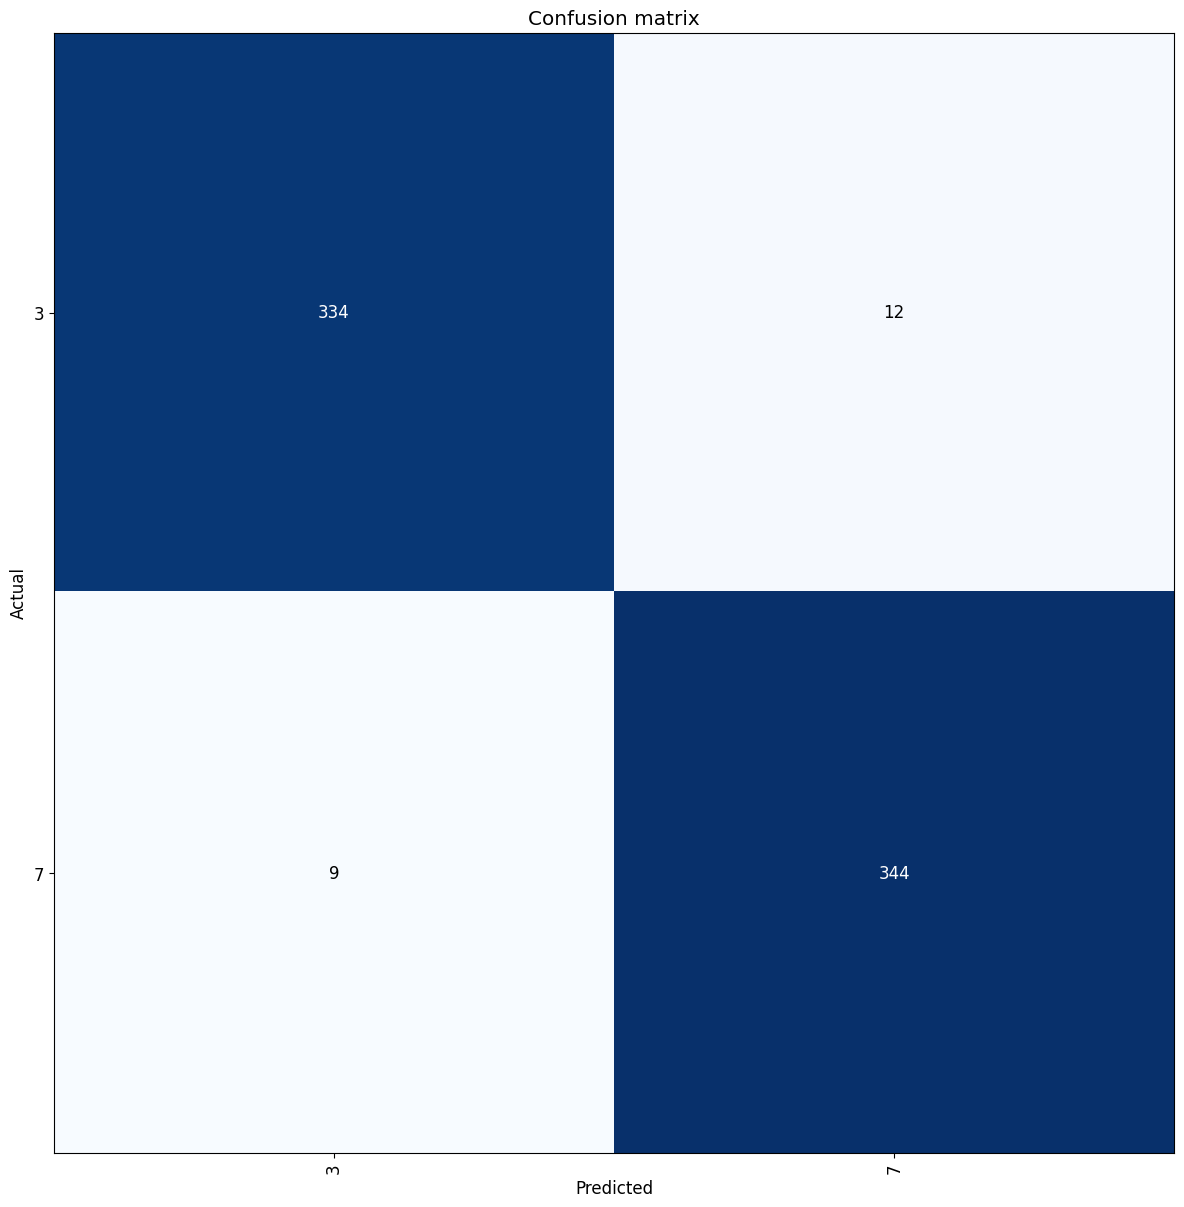

In [23]:
# Get the classification interpretation
interp = ClassificationInterpretation.from_learner(learner)

# Plot the confusion matrix
interp.plot_confusion_matrix(figsize=(12,12))

In [26]:
#making predictions on test data
test_files = get_image_files(path/'test')
test_dl = learner.dls.test_dl(test_files)
preds, _ = learner.get_preds(dl=test_dl)

In [27]:
preds

tensor([[1.2215e-03, 9.9878e-01],
        [9.3988e-01, 6.0116e-02],
        [9.9971e-01, 2.8850e-04],
        [5.9150e-06, 9.9999e-01],
        [9.9237e-01, 7.6280e-03],
        [1.6574e-07, 1.0000e+00],
        [1.0000e+00, 1.5653e-07],
        [8.5314e-01, 1.4686e-01],
        [9.9993e-01, 7.4699e-05],
        [1.3587e-07, 1.0000e+00],
        [2.5483e-02, 9.7452e-01],
        [1.2839e-05, 9.9999e-01],
        [9.8831e-07, 1.0000e+00],
        [2.4825e-08, 1.0000e+00],
        [9.6958e-01, 3.0420e-02],
        [3.2829e-02, 9.6717e-01],
        [9.9934e-01, 6.5969e-04],
        [9.9987e-01, 1.2860e-04],
        [3.8418e-01, 6.1582e-01],
        [9.9928e-01, 7.2468e-04]])

In [30]:
# Get the predicted class indices
pred_labels = preds.argmax(dim=1)

# Get the predicted class names
pred_classes = [learner.dls.vocab[i] for i in pred_labels]

<Axes: title={'center': 'Predicted Class: 3'}>

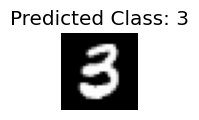

In [38]:
img = PILImage.create(test_dl.dataset.items[1])
# Display the image and its predicted class
img.show(title=f'Predicted Class: {pred_classes[1]}')

# Image Segmentation

In [39]:
path = untar_data(URLs.CAMVID_TINY)
path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/codes.txt'),Path('/root/.fastai/data/camvid_tiny/labels'),Path('/root/.fastai/data/camvid_tiny/images')]

In [40]:
#creating a data loaderm batch size is 8, cobes is basically mapping to numeric lables to their text values
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames=get_image_files(path/"images"),
    label_func=lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes=np.loadtxt(path/'codes.txt', dtype=str)
)

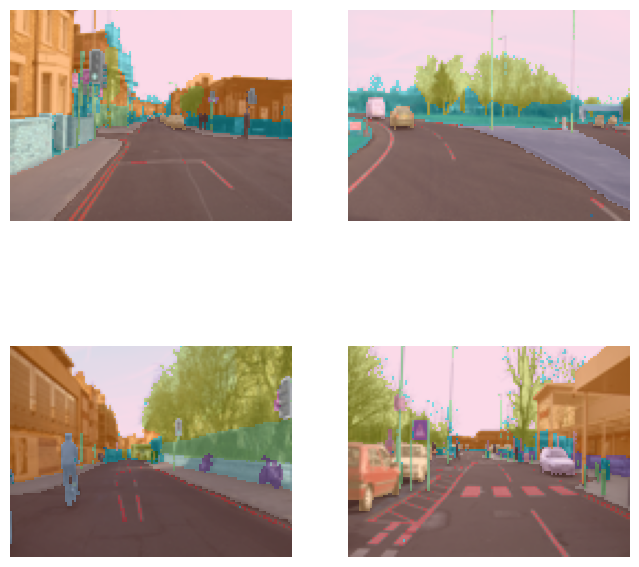

In [41]:
#visualizing the dls
#visualizing some data from our data loader, as we have loaded the segmented version, we seee the segments as well on top of the image
dls.show_batch(max_n=4, nrows=2,figsize=(8,8))

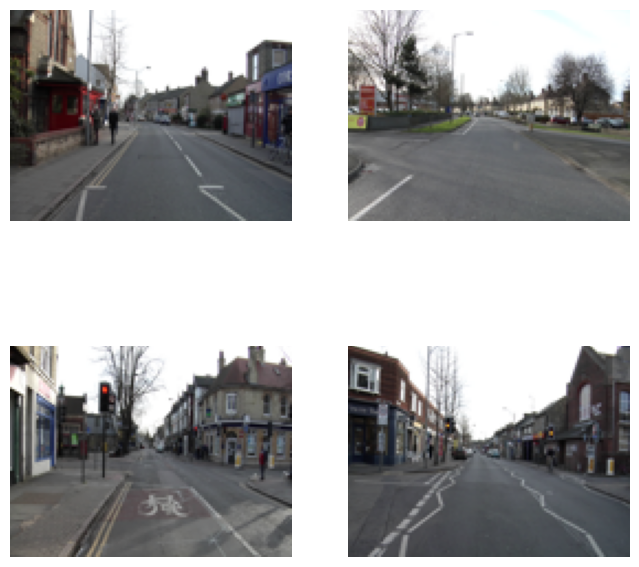

In [46]:
#visualizing the test set how images are without each pixelbeing segmented
dls.test_dl(get_image_files(path/'images')).show_batch(max_n=4, nrows=2,figsize=(8,8))

In [47]:
#initialinzing a learner using resent 34
segment_learner = unet_learner(dls, resnet34)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 90.4MB/s]


In [48]:
#fine tuning the learner for 8 epochs
segment_learner.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.764806,2.511304,00:02


epoch,train_loss,valid_loss,time
0,1.729861,1.558589,00:01
1,1.532201,1.353763,00:01
2,1.370350,1.154547,00:01
3,1.249802,0.926484,00:01
4,1.131562,0.866587,00:01
5,1.027634,0.820286,00:01
6,0.941385,0.810274,00:01
7,0.873287,0.797004,00:01


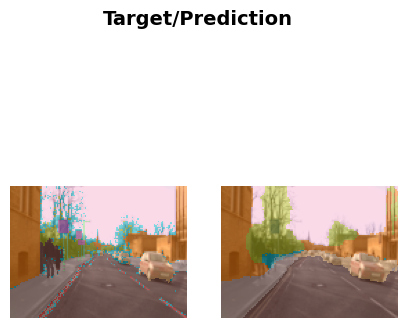

In [54]:
#using the learner making the prediction and visulizing them
segment_learner.show_results(max_n=1, figsize=(5,5))

Note:
 Object detection is not natively supportted in fastai. As per https://walkwithfastai.com/Object_Detection it can be done using fast ai along with wwf however new version of fastai is not compatibile with wwf and on downgrading the fastai version I am encountering multiple dependencies issues , with respect to torch and many other packages